# Lab 03 - Extended Exercises
## Explaining and predicting student performance

We recommend using Noto for this lecture tutorial, where we've already installed the dependencies of the pymer4 package and statsmodels.

In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import the linear regression model class
from pymer4.models import lm

# Import the lmm model class
from pymer4.models import lmer

# Import Gaussian modeling
import statsmodels.formula.api as smf

import scipy as sp
from scipy import stats

# Data directory
DATA_DIR = "./../../data/"

In [2]:
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

npt_config = {
    'session_name': 'lab-03',
    'session_owner': 'mlbd',
    'sender_name': input("Your name: "),
}

Your name:  Parsa


## Introduction
The data has already been cleaned and it comes from 29 students in 3 different groups in a course of 26 weeks.

In this lab you will explore different models to explain the quiz grade. 

In [3]:
# Load data
df= pd.read_csv(f'{DATA_DIR}grades_in_time.csv.gz')
send(len(df),0)
df.head()

,student,week,studying_hours,group,quiz_grade
0,0,0,39.9,3,6.1
1,0,1,32.4,3,7.0
2,0,2,17.5,3,6.9
3,0,3,16.0,3,7.0
4,0,4,15.9,3,7.2


In [4]:
df.describe(include='all')

,student,week,studying_hours,group,quiz_grade
count,810.000000,810.000000,810.000000,810.000000,810.000000
mean,14.500000,13.000000,10.050617,1.933333,6.931975
std,8.660789,7.793693,8.270041,0.772199,1.336888
min,0.000000,0.000000,1.000000,1.000000,1.200000
25%,7.000000,6.000000,5.700000,1.000000,6.400000
50%,14.500000,13.000000,7.800000,2.000000,7.200000
75%,22.000000,20.000000,11.100000,3.000000,7.800000
max,29.000000,26.000000,64.000000,3.000000,10.100000


# Task 1: Linear Model
----------
### 1.1 Preprocess the data to run a regression model to explain the effect of studying hours on quiz grade.  

In [5]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['studying_hours']
X = df[columns_to_scale]
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
simple_X = pd.DataFrame(X, columns = columns_to_scale)
df_scaled = pd.concat([simple_X, df[['quiz_grade', 'week', 'student', 'group']]], axis=1)

In [7]:
df_scaled.head(2)

,studying_hours,quiz_grade,week,student,group
0,3.611569,6.1,0,0,3
1,2.704121,7.0,1,0,3


### 1.2 Explain your preprocessing steps

In [8]:
answer = """
Standardization helps correctly compare multiple variables (in different units) and 
reduce multicollinearity.
In this case, we only have one variable feature. Thus, it is not necessary but 
it is a good practice. 
"""

send(answer, 12) 

<Response [200]>

### 1.3 Run a regression model to explain the effect of studying hours on quiz grade.  

In [9]:
model1_str = """quiz_grade ~ 0 + studying_hours """ ## Write your model here
send(model1_str,13)
model = lm(model1_str, data=pl.DataFrame(df_scaled), family='gaussian')

# Fit the models
model.fit(summary=True)

GT(_tbl_data=shape: (1, 9)
┌────────────────┬──────────┬───────────┬──────────┬───┬─────────┬─────┬─────────┬───────┐
│ term           ┆ estimate ┆ std_error ┆ conf_low ┆ … ┆ t_stat  ┆ df  ┆ p_value ┆ stars │
│ ---            ┆ ---      ┆ ---       ┆ ---      ┆   ┆ ---     ┆ --- ┆ ---     ┆ ---   │
│ str            ┆ f64      ┆ f64       ┆ f64      ┆   ┆ f64     ┆ i64 ┆ str     ┆ str   │
╞════════════════╪══════════╪═══════════╪══════════╪═══╪═════════╪═════╪═════════╪═══════╡
│ studying_hours ┆ 0.603242 ┆ 0.247293  ┆ 0.11783  ┆ … ┆ 2.43938 ┆ 809 ┆ 0.01493 ┆ *     │
└────────────────┴──────────┴───────────┴──────────┴───┴─────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x788b44dcd820>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x788b1955bbc0>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(quiz_grade~0+studying_hours)', subtitle=Md(text='Number of observations: *810*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.0073*  \n            R-squared-adj: *0.0061*  \n            *F(1, 809) = 5.951, p = 0.0149*  \n            Log-likelihood: *-2729*  \n            AIC: *5462* | BIC: *5472*  \n            Residual error: *7.038*  \n        '), preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x788b130edc10>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x788b1319a120>, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x788b1274e3f0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x788b4d790500>, <great_tables._gt_data.FormatInfo object at 0x788b12a685c0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu',

In [10]:
model1_str = """quiz_grade ~ 1 + studying_hours """ ## Write your model here
send(model1_str,13)
model = lm(model1_str, data=pl.DataFrame(df_scaled), family='gaussian')

# Fit the models
model.fit(summary=True)

GT(_tbl_data=shape: (2, 9)
┌────────────────┬──────────┬───────────┬──────────┬───┬────────────┬─────┬─────────┬───────┐
│ term           ┆ estimate ┆ std_error ┆ conf_low ┆ … ┆ t_stat     ┆ df  ┆ p_value ┆ stars │
│ ---            ┆ ---      ┆ ---       ┆ ---      ┆   ┆ ---        ┆ --- ┆ ---     ┆ ---   │
│ str            ┆ f64      ┆ f64       ┆ f64      ┆   ┆ f64        ┆ i64 ┆ str     ┆ str   │
╞════════════════╪══════════╪═══════════╪══════════╪═══╪════════════╪═════╪═════════╪═══════╡
│ (Intercept)    ┆ 6.931975 ┆ 0.041939  ┆ 6.849653 ┆ … ┆ 165.287741 ┆ 808 ┆         ┆ ***   │
│ studying_hours ┆ 0.603242 ┆ 0.041939  ┆ 0.52092  ┆ … ┆ 14.383841  ┆ 808 ┆ <.001   ┆ ***   │
└────────────────┴──────────┴───────────┴──────────┴───┴────────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x788b1278dd30>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x788b1278d4f0>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(quiz_grade~1+studying_hours)', subtitle=Md(text='Number of observations: *810*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.2039*  \n            R-squared-adj: *0.2029*  \n            *F(1, 808) = 206.895, p = <.001*  \n            Log-likelihood: *-1291*  \n            AIC: *2589* | BIC: *2603*  \n            Residual error: *1.194*  \n        '), preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x788b1278d610>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x788b1278d670>, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x788b1278dc40>, _formats=[<great_tables._gt_data.FormatInfo object at 0x788b1278e180>, <great_tables._gt_data.FormatInfo object at 0x788b1278d8b0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category=

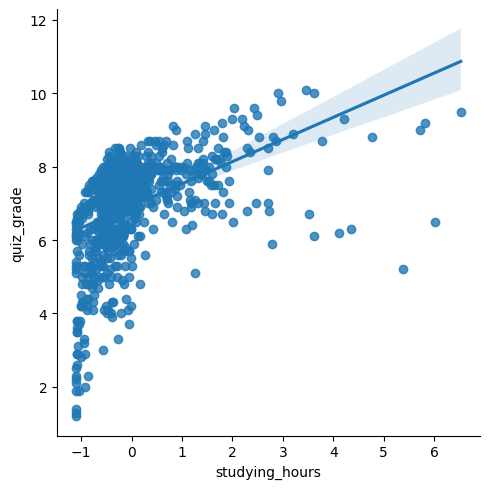

In [11]:
sns.lmplot(x="studying_hours", y="quiz_grade", data=df_scaled)

### 1.3 What model family (poisson, logistic, etc) did you use and why? 

In [12]:
answer = """
Gaussian is a good approximation becauset the dependent feature (y) is continuous (not discrete or binary).
"""

send(answer, 13) 

<Response [200]>

<Axes: xlabel='quiz_grade', ylabel='Count'>

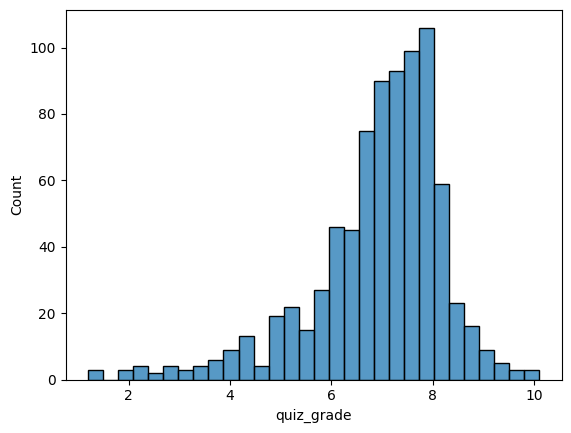

In [13]:
sns.histplot(df_scaled["quiz_grade"])

### 1.4 Interpret the regression results. 
Do the variables have a positive or negative effect? Is it significant?

In [14]:
answer = """
The number of studying hours has a positive and significant effect.
"""

send(answer, 14) 

<Response [200]>

### 1.5 Is this an appropriate method? Explain why or why not.

In [15]:
answer = """
No, because group differences are not taken into account.
"""

send(answer, 15) 

<Response [200]>

# Task 2: Linear Model with Fixed Effects
----------
### 2.1  Run a regression model to explain the effect of studying hours on quiz grade. Add fixed effects for group. 

In [16]:
df_scaled['group'] = df_scaled['group'].astype(str)

In [17]:
model = lm("""quiz_grade ~ 1 + studying_hours  + group""", data=pl.DataFrame(df_scaled), family='gaussian')

# Fit the models
model.fit(summary=True)

GT(_tbl_data=shape: (4, 9)
┌────────────────┬──────────┬───────────┬──────────┬───┬──────────┬─────┬─────────┬───────┐
│ term           ┆ estimate ┆ std_error ┆ conf_low ┆ … ┆ t_stat   ┆ df  ┆ p_value ┆ stars │
│ ---            ┆ ---      ┆ ---       ┆ ---      ┆   ┆ ---      ┆ --- ┆ ---     ┆ ---   │
│ str            ┆ f64      ┆ f64       ┆ f64      ┆   ┆ f64      ┆ i64 ┆ str     ┆ str   │
╞════════════════╪══════════╪═══════════╪══════════╪═══╪══════════╪═════╪═════════╪═══════╡
│ (Intercept)    ┆ 6.586245 ┆ 0.071819  ┆ 6.445272 ┆ … ┆ 91.70675 ┆ 806 ┆         ┆ ***   │
│ studying_hours ┆ 0.647299 ┆ 0.042323  ┆ 0.564223 ┆ … ┆ 15.29439 ┆ 806 ┆ <.001   ┆ ***   │
│ group2         ┆ 0.551375 ┆ 0.098804  ┆ 0.357431 ┆ … ┆ 5.58047  ┆ 806 ┆ <.001   ┆ ***   │
│ group3         ┆ 0.469424 ┆ 0.106844  ┆ 0.259698 ┆ … ┆ 4.393538 ┆ 806 ┆ <.001   ┆ ***   │
└────────────────┴──────────┴───────────┴──────────┴───┴──────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x788b0bd3f8f0>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x788b0b52afc0>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(quiz_grade~1+studying_hours+group)', subtitle=Md(text='Number of observations: *810*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.2369*  \n            R-squared-adj: *0.234*  \n            *F(3, 806) = 83.385, p = <.001*  \n            Log-likelihood: *-1274*  \n            AIC: *2559* | BIC: *2582*  \n            Residual error: *1.17*  \n        '), preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x788b0bdd3ef0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x788b1274c770>, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=Non

### 2.2 Interpret the regression results. 
What changed? What does it mean to have group fixed effects? 

In [18]:
answer = """
 Group fixed effects allow us to difference out any constant differences between groups,
 and focus only on changes within each entity over time.
"""

send(answer, 22) 

<Response [200]>

# Task 3: Linear Model with Random Effects
----------
### 3.1  Run a regression model to explain the effect of studying hours on quiz grade. Add random intercept for group. 

In [19]:
model = lmer("""quiz_grade ~ 1 + (1|group) + studying_hours """, data=pl.DataFrame(df_scaled))

# Fit the models
model.fit(summary=True)

GT(_tbl_data=shape: (6, 10)
┌──────────────┬─────────────┬──────────┬───────────┬───┬───────────┬────────────┬─────────┬───────┐
│ rfx          ┆ param       ┆ estimate ┆ std_error ┆ … ┆ t_stat    ┆ df         ┆ p_value ┆ stars │
│ ---          ┆ ---         ┆ ---      ┆ ---       ┆   ┆ ---       ┆ ---        ┆ ---     ┆ ---   │
│ str          ┆ str         ┆ f64      ┆ f64       ┆   ┆ f64       ┆ f64        ┆ str     ┆ str   │
╞══════════════╪═════════════╪══════════╪═══════════╪═══╪═══════════╪════════════╪═════════╪═══════╡
│ group-sd     ┆ (Intercept) ┆ 0.289209 ┆ null      ┆ … ┆ null      ┆ null       ┆ null    ┆ null  │
│ Residual-sd  ┆ Observation ┆ 1.17005  ┆ null      ┆ … ┆ null      ┆ null       ┆ null    ┆ null  │
│ null         ┆ null        ┆ null     ┆ null      ┆ … ┆ null      ┆ null       ┆ null    ┆ null  │
│ Fixed        ┆ null        ┆ null     ┆ null      ┆ … ┆ null      ┆ null       ┆ null    ┆ null  │
│ Effects:     ┆             ┆          ┆           ┆   ┆           ┆            ┆         ┆       │
│ null         ┆ (Intercept) ┆ 6.926649 ┆ 0.172094  ┆ … ┆ 40.249269 ┆ 2.004041   ┆ <.001   ┆ ***   │
│ null         ┆ studying_ho ┆ 0.644949 ┆ 0.042256  ┆ … ┆ 15.262826 ┆ 807.849278 ┆ <.001   ┆ ***   │
│              ┆ urs         ┆          ┆           ┆   ┆           ┆            ┆         ┆       │
└──────────────┴─────────────┴──────────┴───────────┴───┴───────────┴────────────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x788b1274fa10>, _boxhead=Boxhead([ColInfo(var='rfx', type=<ColInfoTypeEnum.default: 1>, column_label='Random Effects:', column_align='left', column_width=None), ColInfo(var='param', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x788b0bdeb290>, _spanners=Spanners([]), _heading=Heading(title='Formula: lmer(quiz_grade~1+(1|group)+studying_hours)', subtitle=Md(text='Number of observations: *810*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            Log-likelihood: *-1282*  \n            AIC: *2573* | BIC: *2592*  \n            Residual error: *1.17*  \n        '), preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x788b12887c80>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x788b12794d10>, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns=['param'], rows=None, mask=None), grpname=None, colname='param', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=['param'], rows=None, mask=None), grpname=None, colname='param', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, d

### 3.2 Plot the regression lines

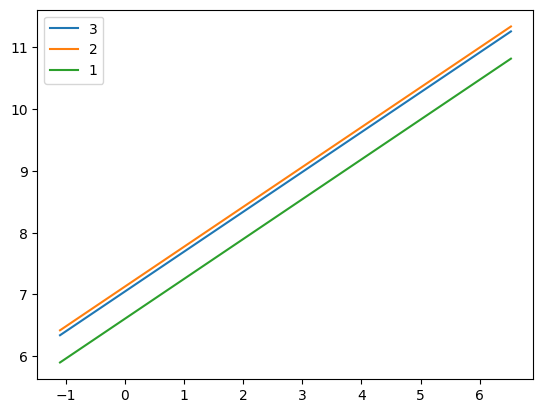

In [20]:
plot_data = df_scaled.copy()

xgrid = np.linspace(plot_data["studying_hours"].min(), plot_data["studying_hours"].max(), 100)

grid = pd.DataFrame([
    {"group": g, "studying_hours": x}
    for g in plot_data["group"].unique()
    for x in xgrid
])

grid["predicted"] = model.predict(pl.DataFrame(grid))

plt.figure()
for g in grid["group"].unique():
    s = grid[grid["group"] == g]
    plt.plot(s["studying_hours"], s["predicted"], label=str(g))
plt.legend()
plt.show()

### 3.3  Run a regression model to explain the effect of studying hours on quiz grade. Add slope for group. 

In [21]:
model = lmer("""quiz_grade ~ 1  + (0 + studying_hours|group) """, data=pl.DataFrame(df_scaled))

# Fit the models
model.fit(summary=True)

GT(_tbl_data=shape: (5, 10)
┌─────────────┬─────────────┬──────────┬───────────┬───┬────────────┬────────────┬─────────┬───────┐
│ rfx         ┆ param       ┆ estimate ┆ std_error ┆ … ┆ t_stat     ┆ df         ┆ p_value ┆ stars │
│ ---         ┆ ---         ┆ ---      ┆ ---       ┆   ┆ ---        ┆ ---        ┆ ---     ┆ ---   │
│ str         ┆ str         ┆ f64      ┆ f64       ┆   ┆ f64        ┆ f64        ┆ str     ┆ str   │
╞═════════════╪═════════════╪══════════╪═══════════╪═══╪════════════╪════════════╪═════════╪═══════╡
│ group-sd    ┆ studying_ho ┆ 0.601945 ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│             ┆ urs         ┆          ┆           ┆   ┆            ┆            ┆         ┆       │
│ Residual-sd ┆ Observation ┆ 1.094495 ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ null        ┆ null        ┆ null     ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ Fixed       ┆ null        ┆ null     ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ Effects:    ┆             ┆          ┆           ┆   ┆            ┆            ┆         ┆       │
│ null        ┆ (Intercept) ┆ 6.8531   ┆ 0.044311  ┆ … ┆ 154.658061 ┆ 739.486893 ┆         ┆ ***   │
└─────────────┴─────────────┴──────────┴───────────┴───┴────────────┴────────────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x788b0bde9f70>, _boxhead=Boxhead([ColInfo(var='rfx', type=<ColInfoTypeEnum.default: 1>, column_label='Random Effects:', column_align='left', column_width=None), ColInfo(var='param', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x788b0b5ccef0>, _spanners=Spanners([]), _heading=Heading(title='Formula: lmer(quiz_grade~1+(0+studying_hours|group))', subtitle=Md(text='Number of observations: *810*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            Log-likelihood: *-1230*  \n            AIC: *2466* | BIC: *2480*  \n            Residual error: *1.094*  \n        '), preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x788b0b5ce8d0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x788b0b5cde50>, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns=['param'], rows=None, mask=None), grpname=None, colname='param', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=['param'], rows=None, mask=None), grpname=None, colname='param', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=['param'], rows=

### 3.4 Plot the regression lines

In [22]:
intercept = model.params.filter(pl.col("term") == "(Intercept)")["estimate"][0]

model.ranef.head()

level,studying_hours
str,f64
"""1""",1.021431
"""2""",-0.010058
"""3""",0.059044


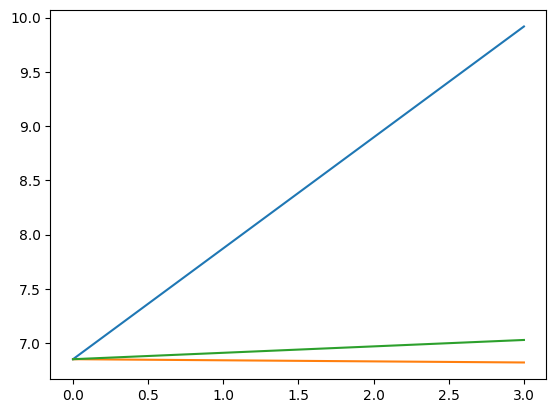

In [23]:
x = np.linspace(0, 3,4)
for i, row in model.ranef.to_pandas().iterrows():
    sns.lineplot(x=x, y=intercept + row['studying_hours']*x)

### 3.5  Run a regression model to explain the effect of studying hours on quiz grade. Add random intercept and slope for group. 

In [24]:
model = lmer("""quiz_grade ~ (1 + studying_hours|group) """, data=pl.DataFrame(df_scaled))

# Fit the models
model.fit(summary=True)

R messages: 
boundary (singular) fit: see help('isSingular')

Random effect variances not available. Returned R2 does not account for random effects.

R messages: 
boundary (singular) fit: see help('isSingular')

Random effect variances not available. Returned R2 does not account for random effects.



GT(_tbl_data=shape: (7, 10)
┌─────────────┬─────────────┬──────────┬───────────┬───┬────────────┬────────────┬─────────┬───────┐
│ rfx         ┆ param       ┆ estimate ┆ std_error ┆ … ┆ t_stat     ┆ df         ┆ p_value ┆ stars │
│ ---         ┆ ---         ┆ ---      ┆ ---       ┆   ┆ ---        ┆ ---        ┆ ---     ┆ ---   │
│ str         ┆ str         ┆ f64      ┆ f64       ┆   ┆ f64        ┆ f64        ┆ str     ┆ str   │
╞═════════════╪═════════════╪══════════╪═══════════╪═══╪════════════╪════════════╪═════════╪═══════╡
│ group-sd    ┆ (Intercept) ┆ 0.405722 ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ group-sd    ┆ studying_ho ┆ 0.640187 ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│             ┆ urs         ┆          ┆           ┆   ┆            ┆            ┆         ┆       │
│ group-cor   ┆ (Intercept) ┆ -1.0     ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ Residual-sd ┆ Observation ┆ 1.060082 ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ null        ┆ null        ┆ null     ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ Fixed       ┆ null        ┆ null     ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ Effects:    ┆             ┆          ┆           ┆   ┆            ┆            ┆         ┆       │
│ null        ┆ (Intercept) ┆ 7.179816 ┆ 0.049868  ┆ … ┆ 143.975807 ┆ 359.076872 ┆ <.001   ┆ ***   │
└─────────────┴─────────────┴──────────┴───────────┴───┴────────────┴────────────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x788b0a7330b0>, _boxhead=Boxhead([ColInfo(var='rfx', type=<ColInfoTypeEnum.default: 1>, column_label='Random Effects:', column_align='left', column_width=None), ColInfo(var='param', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x788b0a7591c0>, _spanners=Spanners([]), _heading=Heading(title='Formula: lmer(quiz_grade~(1+studying_hours|group))', subtitle=Md(text='Number of observations: *810*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            Log-likelihood: *-1205*  \n            AIC: *2421* | BIC: *2444*  \n            Residual error: *1.06*  \n        '), preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x788b0a733020>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x788b0a731790>, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns=['param'], rows=None, mask=None), grpname=None, colname='param', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=['param'], rows=None, mask=None), grpname=None, colname='param', rownum=1, colnum=None, styles=[CellStyleText(color

In [25]:
model.ranef

level,(Intercept),studying_hours
str,f64,f64
"""1""",-0.679018,1.07142
"""2""",-0.166013,0.261951
"""3""",-0.018387,0.029013


### 3.6 Plot the regression lines

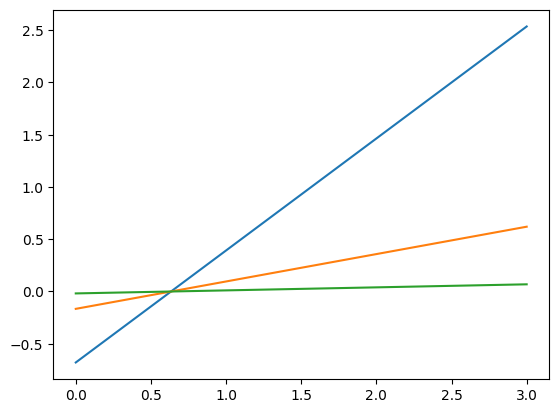

In [27]:
x = np.linspace(0, 3,4)
for i, row in model.ranef.to_pandas().iterrows():
    sns.lineplot(x=x, y=row['(Intercept)'] + row['studying_hours']*x)

### 3.7 Interpret the regression results. 
What changed? What does it mean to have group random effects? 

In [28]:
answer = """
Effects are fixed if they are interesting in themselves
or random if there is interest in the underlying population.
With intercept random effects, we assumed that every group has a different starting 
point (y-intercept) and with slope random effects we assume that every group has a different rate.  
"""

send(answer, 37) 

<Response [200]>

# Task 4: Mixed Model with Time Interaction 
----------
### 4.1  Again, run a regression model to explain the effect of studying hours on quiz grade. Add random intercept and slope for groups AND interaction between the number of stuyding hours and time (weeks). 


In [29]:
model = lmer("""quiz_grade ~  (1 + studying_hours*week|group) """, data=pl.DataFrame(df_scaled))

# Fit the models
model.fit(summary=True)

R messages: 
boundary (singular) fit: see help('isSingular')

Random effect variances not available. Returned R2 does not account for random effects.

R messages: 
boundary (singular) fit: see help('isSingular')

Random effect variances not available. Returned R2 does not account for random effects.



GT(_tbl_data=shape: (14, 10)
┌─────────────┬────────────┬───────────┬───────────┬───┬────────────┬────────────┬─────────┬───────┐
│ rfx         ┆ param      ┆ estimate  ┆ std_error ┆ … ┆ t_stat     ┆ df         ┆ p_value ┆ stars │
│ ---         ┆ ---        ┆ ---       ┆ ---       ┆   ┆ ---        ┆ ---        ┆ ---     ┆ ---   │
│ str         ┆ str        ┆ f64       ┆ f64       ┆   ┆ f64        ┆ f64        ┆ str     ┆ str   │
╞═════════════╪════════════╪═══════════╪═══════════╪═══╪════════════╪════════════╪═════════╪═══════╡
│ group-sd    ┆ (Intercept ┆ 1.304311  ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│             ┆ )          ┆           ┆           ┆   ┆            ┆            ┆         ┆       │
│ group-sd    ┆ studying_h ┆ 1.22966   ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│             ┆ ours       ┆           ┆           ┆   ┆            ┆            ┆         ┆       │
│ group-sd    ┆ week       ┆ 0.109378  ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ group-sd    ┆ studying_h ┆ 0.071092  ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│             ┆ ours:week  ┆           ┆           ┆   ┆            ┆            ┆         ┆       │
│ group-cor   ┆ (Intercept ┆ -0.733165 ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│             ┆ )          ┆           ┆           ┆   ┆            ┆            ┆         ┆       │
│ …           ┆ …          ┆ …         ┆ …         ┆ … ┆ …          ┆ …          ┆ …       ┆ …     │
│ group-cor   ┆ week       ┆ 0.262663  ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ Residual-sd ┆ Observatio ┆ 0.668178  ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│             ┆ n          ┆           ┆           ┆   ┆            ┆            ┆         ┆       │
│ null        ┆ null       ┆ null      ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ Fixed       ┆ null       ┆ null      ┆ null      ┆ … ┆ null       ┆ null       ┆ null    ┆ null  │
│ Effects:    ┆            ┆           ┆           ┆   ┆            ┆            ┆         ┆       │
│ null        ┆ (Intercept ┆ 7.142386  ┆ 0.034364  ┆ … ┆ 207.847602 ┆ 212.364424 ┆ <.001   ┆ ***   │
│             ┆ )          ┆           ┆           ┆   ┆            ┆            ┆         ┆       │
└─────────────┴────────────┴───────────┴───────────┴───┴────────────┴────────────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x788b13198050>, _boxhead=Boxhead([ColInfo(var='rfx', type=<ColInfoTypeEnum.default: 1>, column_label='Random Effects:', column_align='left', column_width=None), ColInfo(var='param', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x788b12fc6480>, _spanners=Spanners([]), _heading=Heading(title='Formula: lmer(quiz_grade~(1+studying_hours*week|group))', subtitle=Md(text='Number of observations: *810*  \n            Confidence intervals: *paramet

### 4.2 Interpret the regression results.  

In [30]:
answer = """
The variance of quiz grade by groups is estimated as 1.600 + 1.515 + 0.12 + 0.005 + 0.445 (from the residual) = 3.685
The studying hours by groups explain a big part of the variance (41%) but the interaction between studying hours and weeks
explains much less of the variance (0.1%).
We also observe a high correlation between random effects (intercept and slope) within each group. 
Studying hours is negatively correlated (-0.73) with the intercept as well as weeks (-0.97). 
The interaction term is weakly correlated with the intercept. 

When analyzing the coefficients (with model.ranef)
we observe that studying hours has a greater coefficient for group 1 (in comparison to the other groups)
and the week has a greater coefficient for group 3 (in comparison to the other groups). 
"""

send(answer, 42) 

<Response [200]>

In [31]:
model.ranef

level,(Intercept),studying_hours,week,studying_hours:week
str,f64,f64,f64,f64
"""1""",-1.352402,2.05303,0.091559,-0.072844
"""2""",-1.427752,0.598642,0.108035,-0.000913
"""3""",-1.175201,0.065531,0.129008,0.09654
